# Web Scraping 


### Importing Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd

### Setup Firefox WebDriver

In [2]:
options = Options()
options.headless = False 
service = Service(executable_path=r"C:\Users\admin\Downloads\geckodriver\geckodriver.exe")
driver = webdriver.Firefox(service=service, options=options)

In [3]:
# Open Flipkart Washing Machine Search
search_url = "https://www.flipkart.com/search?q=washing%20machine&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(search_url)


In [4]:
# Lists to store scraped data

product_names = []
product_prices = []
product_ratings = []
product_reviews = []
product_discounts = []

In [5]:
# Number of pages to scrape
num_pages = 41


In [6]:

for page in range(num_pages):
    print(f"\nScraping page {page + 1}")
    time.sleep(3)  # Give time for page content to load

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # DEBUG: Check if page has the right structure
    products = soup.find_all('div', class_='cPHDOP col-12-12')
    print(f"Products found on this page: {len(products)}")

    for product in products:
        # Product Name
        name = product.find('div', class_='KzDlHZ')
        if name:
            product_names.append(name.get_text(strip=True))

            # Price
            price = product.find('div', class_='Nx9bqj _4b5DiR')
            product_prices.append(price.get_text(strip=True) if price else None)

            # Rating
            rating = product.find('div', class_='XQDdHH')
            product_ratings.append(rating.get_text(strip=True) if rating else None)

            # Reviews
            review = product.find('span', class_='Wphh3N')
            product_reviews.append(review.get_text(strip=True) if review else None)

            # Discount
            discount = product.find('div', class_='UkUFwK')
            product_discounts.append(discount.get_text(strip=True) if discount else None)
             # Move to next page
    try:
        next_button = driver.find_element(By.XPATH, '//a[@class="_9QVEpD"][span[text()="Next"]]')
        next_button.click()
    except Exception as e:
        print(f"No more pages or error clicking 'Next': {e}")
        break



Scraping page 1
Products found on this page: 30

Scraping page 2
Products found on this page: 29

Scraping page 3
Products found on this page: 29

Scraping page 4
Products found on this page: 29

Scraping page 5
Products found on this page: 29

Scraping page 6
Products found on this page: 29

Scraping page 7
Products found on this page: 29

Scraping page 8
Products found on this page: 29

Scraping page 9
Products found on this page: 29

Scraping page 10
Products found on this page: 29

Scraping page 11
Products found on this page: 29

Scraping page 12
Products found on this page: 29

Scraping page 13
Products found on this page: 29

Scraping page 14
Products found on this page: 29

Scraping page 15
Products found on this page: 29

Scraping page 16
Products found on this page: 29

Scraping page 17
Products found on this page: 29

Scraping page 18
Products found on this page: 29

Scraping page 19
Products found on this page: 29

Scraping page 20
Products found on this page: 29

Scraping

In [9]:
# Create DataFrame
df = pd.DataFrame({
    
    "Product Name": product_names,
    "Price": product_prices,
    "Rating": product_ratings,
    "Number of Reviews": product_reviews,
    "Discount": product_discounts
})

# Save to CSV
df.to_csv("webscrabing_c.csv", index=False)
print("Data saved to webscrabing_c.csv")

# Close the browser
driver.quit()


Data saved to webscrabing_c.csv


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("webscrabing_c.csv") 


In [3]:
df.head()         # View first few rows


,Product Name,Price,Rating,Number of Reviews,Discount
0,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,"₹8,190",4.1,"21,600 Ratings&1,927 Reviews",28% off
1,realme TechLife 7 kg 5 Star Rating Fabric Safe...,"₹11,290",4.2,"13,740 Ratings&1,534 Reviews",48% off
2,realme TechLife 7 kg 5 Star rating Semi Automa...,"₹7,690",4.2,"79,020 Ratings&7,237 Reviews",38% off
3,Voltas Beko 8 kg Semi Automatic Top Load Washi...,"₹10,290",4.3,"16,840 Ratings&1,219 Reviews",45% off
4,"LG 7 kg 5 Star, Smart Inverter Technology, Tur...","₹17,990",4.4,"72,597 Ratings&5,309 Reviews",34% off


In [4]:
df.shape          # Rows and columns count

(984, 5)

In [5]:
df.columns        # Column names

Index(['Product Name', 'Price', 'Rating', 'Number of Reviews', 'Discount'], dtype='object')

In [6]:
df.isnull().sum() # Count missing values

Product Name           0
Price                 23
Rating               159
Number of Reviews    159
Discount              44
dtype: int64

In [7]:
# drop rows where product name is missing 

df = df.dropna(subset=['Product Name'])

# fill missing values in numerical-like fields with placeholder or median 

df['Price'] = df['Price'].fillna('₹0')
df['Rating'] = df['Rating'].fillna('0')
df['Number of Reviews'] = df['Number of Reviews'].fillna('0')
df['Discount'] = df['Discount'].fillna('0% Off')


In [8]:
df.isnull().sum() # Count missing values

Product Name         0
Price                0
Rating               0
Number of Reviews    0
Discount             0
dtype: int64

In [9]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())



Duplicates: 114


In [10]:
# remove duplicates

df = df.drop_duplicates()


## Standardise the Format

In [11]:
# Clean Price: extract digits from ₹ and convert to int
df['Price'] = df['Price'].astype(str).str.extract('(\d[\d,]*)')[0].str.replace(',', '').fillna(0).astype(int)

In [12]:
# Clean the 'Rating' column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [13]:
#Split 'Number of Ratings & Reviews' combined column
df[['Number of Ratings', 'Number of Reviews']] = df['Number of Reviews'].astype(str).str.extract(r'([\d,]+)\s*Ratings.*?([\d,]+)\s*Reviews')
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '', regex=False).fillna(0).astype(int)
df['Number of Reviews'] = df['Number of Reviews'].str.replace(',', '', regex=False).fillna(0).astype(int)

In [14]:
#Clean Discount column
df['Discount'] = df['Discount'].astype(str).str.extract(r'(\d+)', expand=False).fillna(0).astype(int)

In [15]:
# Reorder columns neatly
df = df[['Product Name', 'Price', 'Rating', 'Number of Ratings', 'Number of Reviews', 'Discount']]


In [16]:
# Show the cleaned DataFrame
df.head()



,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Discount
0,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,8190,4.1,21600,1927,28
1,realme TechLife 7 kg 5 Star Rating Fabric Safe...,11290,4.2,13740,1534,48
2,realme TechLife 7 kg 5 Star rating Semi Automa...,7690,4.2,79020,7237,38
3,Voltas Beko 8 kg Semi Automatic Top Load Washi...,10290,4.3,16840,1219,45
4,"LG 7 kg 5 Star, Smart Inverter Technology, Tur...",17990,4.4,72597,5309,34


## EDA(Exploratory Data Analysis)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

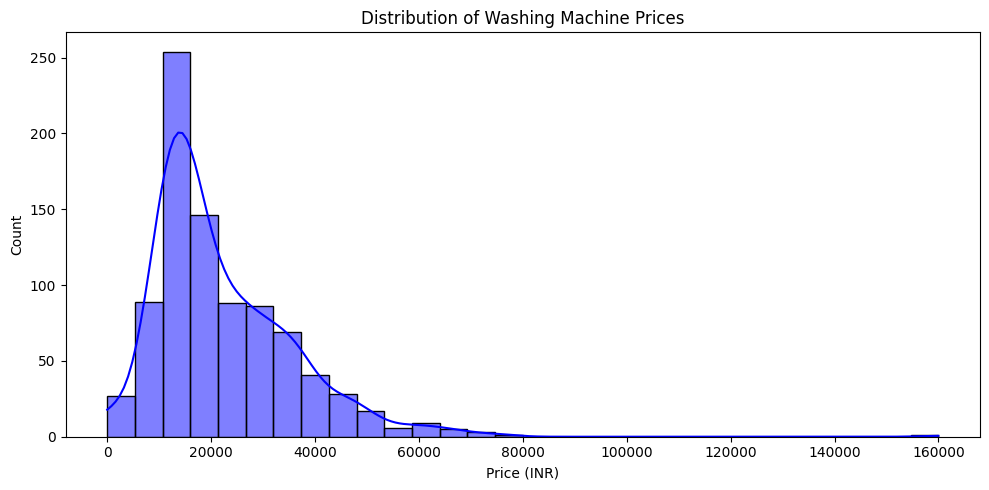

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Washing Machine Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


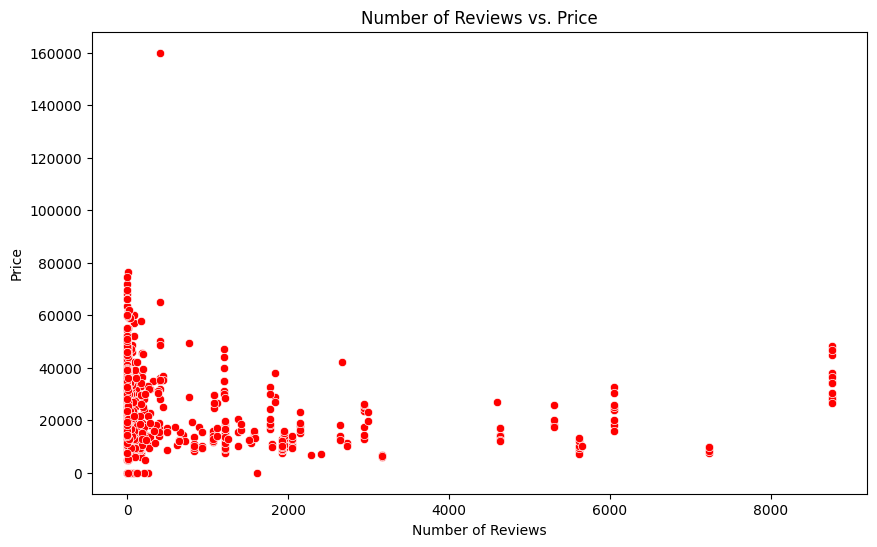

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Reviews', y='Price', data=df, color='red')
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


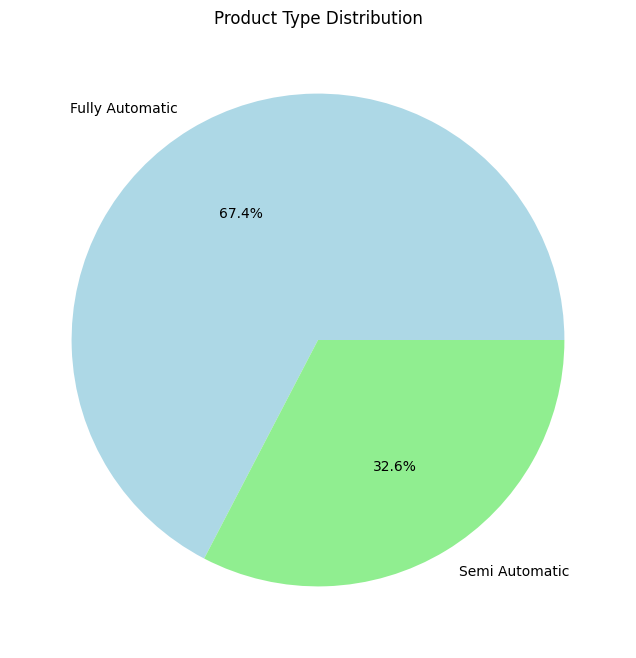

In [19]:
df['Type'] = df['Product Name'].apply(lambda x: 'Semi Automatic' if 'Semi Automatic' in x else 'Fully Automatic')


type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Product Type Distribution')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9716\3209870688.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True, color='teal')


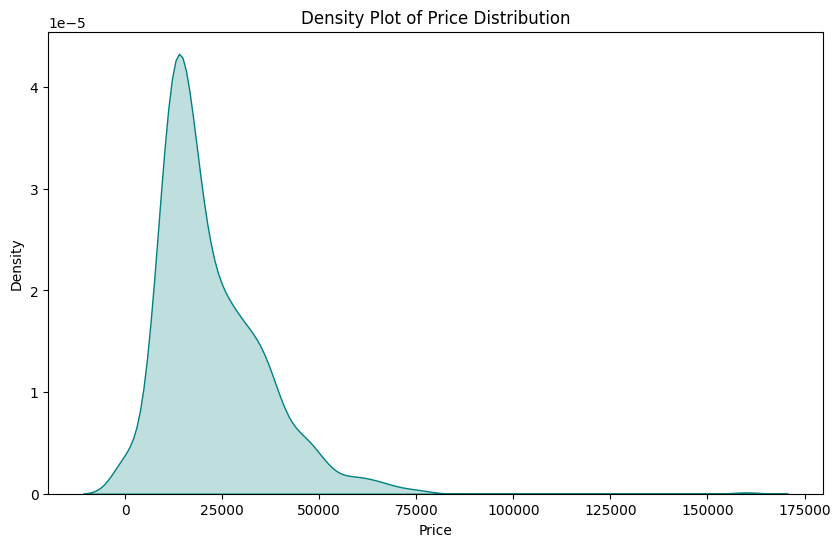

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], shade=True, color='teal')
plt.title('Density Plot of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9716\3849242635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Product Name', data=top_rated, palette='crest')


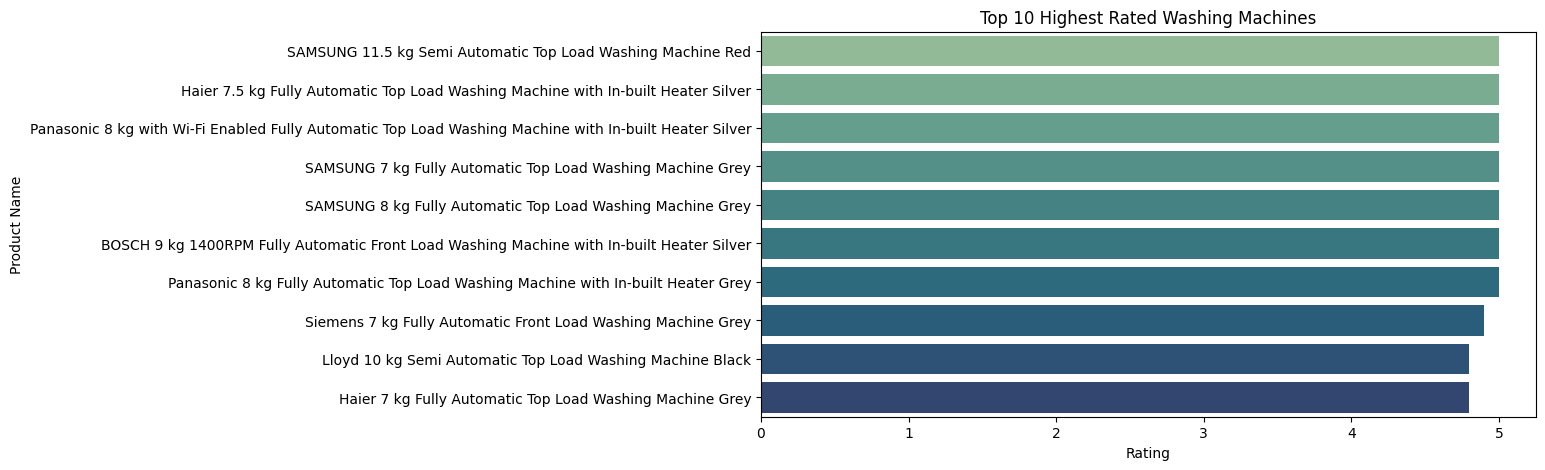

In [21]:
# Top 10 Products with Highest Ratings
top_rated = df[df['Rating'] > 0].sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Rating', y='Product Name', data=top_rated, palette='crest')
plt.title("Top 10 Highest Rated Washing Machines")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.show()


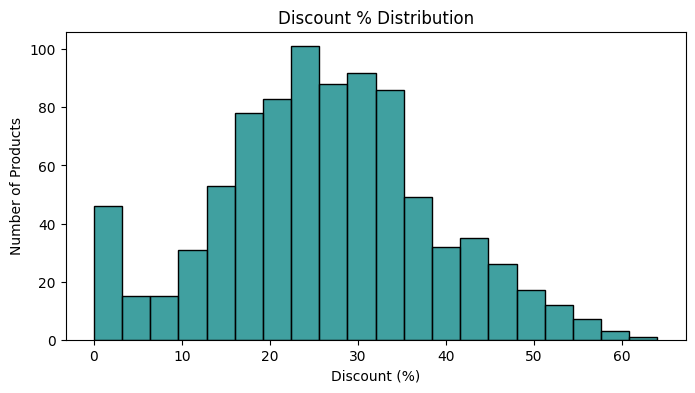

In [22]:
# Discount Distribution 
plt.figure(figsize=(8, 4))
sns.histplot(df['Discount'], bins=20, kde=False, color='teal')
plt.title("Discount % Distribution")
plt.xlabel("Discount (%)")
plt.ylabel("Number of Products")
plt.show()


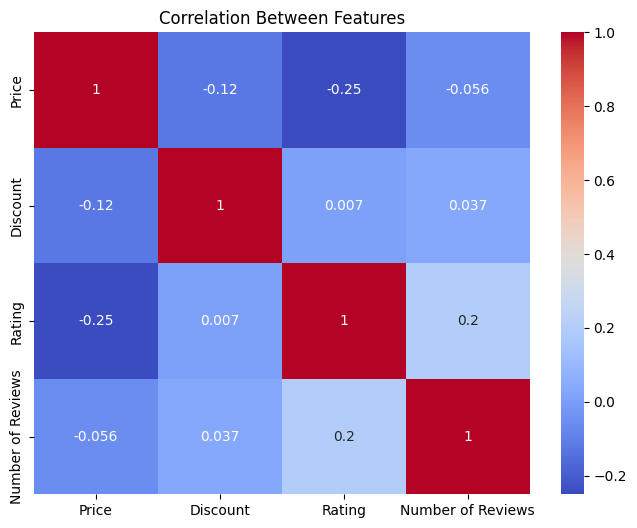

In [23]:
# Correlation between features (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Discount', 'Rating', 'Number of Reviews']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_9716\3760390917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Product Name', data=top_5_price, palette='viridis')


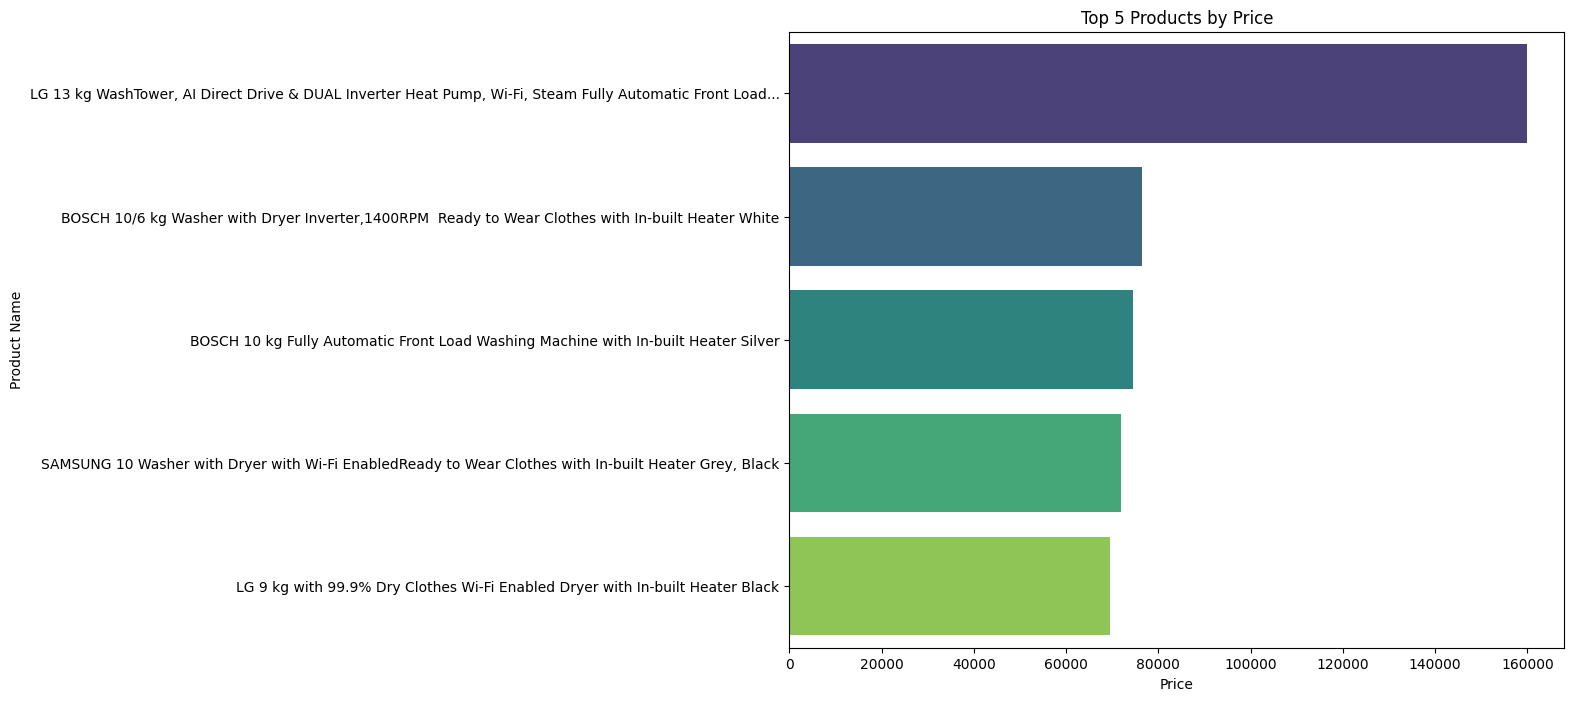

In [24]:
# Top 5 Products by Price
top_5_price = df.sort_values(by='Price', ascending=False).head(5)

plt.figure(figsize=(10, 8))
sns.barplot(x='Price', y='Product Name', data=top_5_price, palette='viridis')
plt.title("Top 5 Products by Price")
plt.xlabel("Price")
plt.ylabel("Product Name")
plt.show()


In [25]:
# Save Cleaned Data

df.to_csv('cleaned_flipkart_washing_machine.csv', index=False)


## Unsupervised Learning

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("cleaned_capstone.csv")


In [32]:
features = df[['Price', 'Rating ', 'Number of Ratings', ' Number of Reviews', 'Discount']]


In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

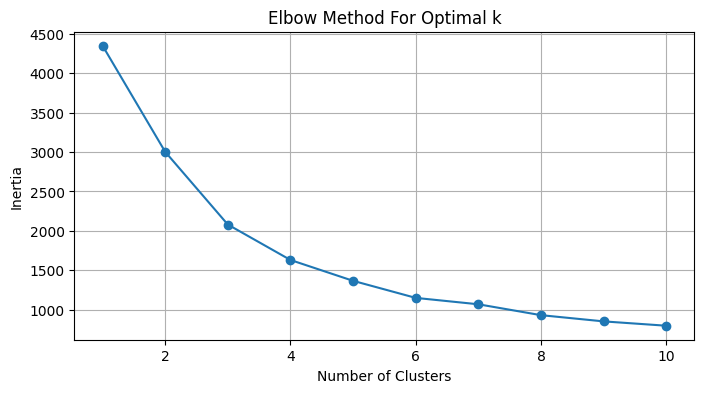

In [34]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [35]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

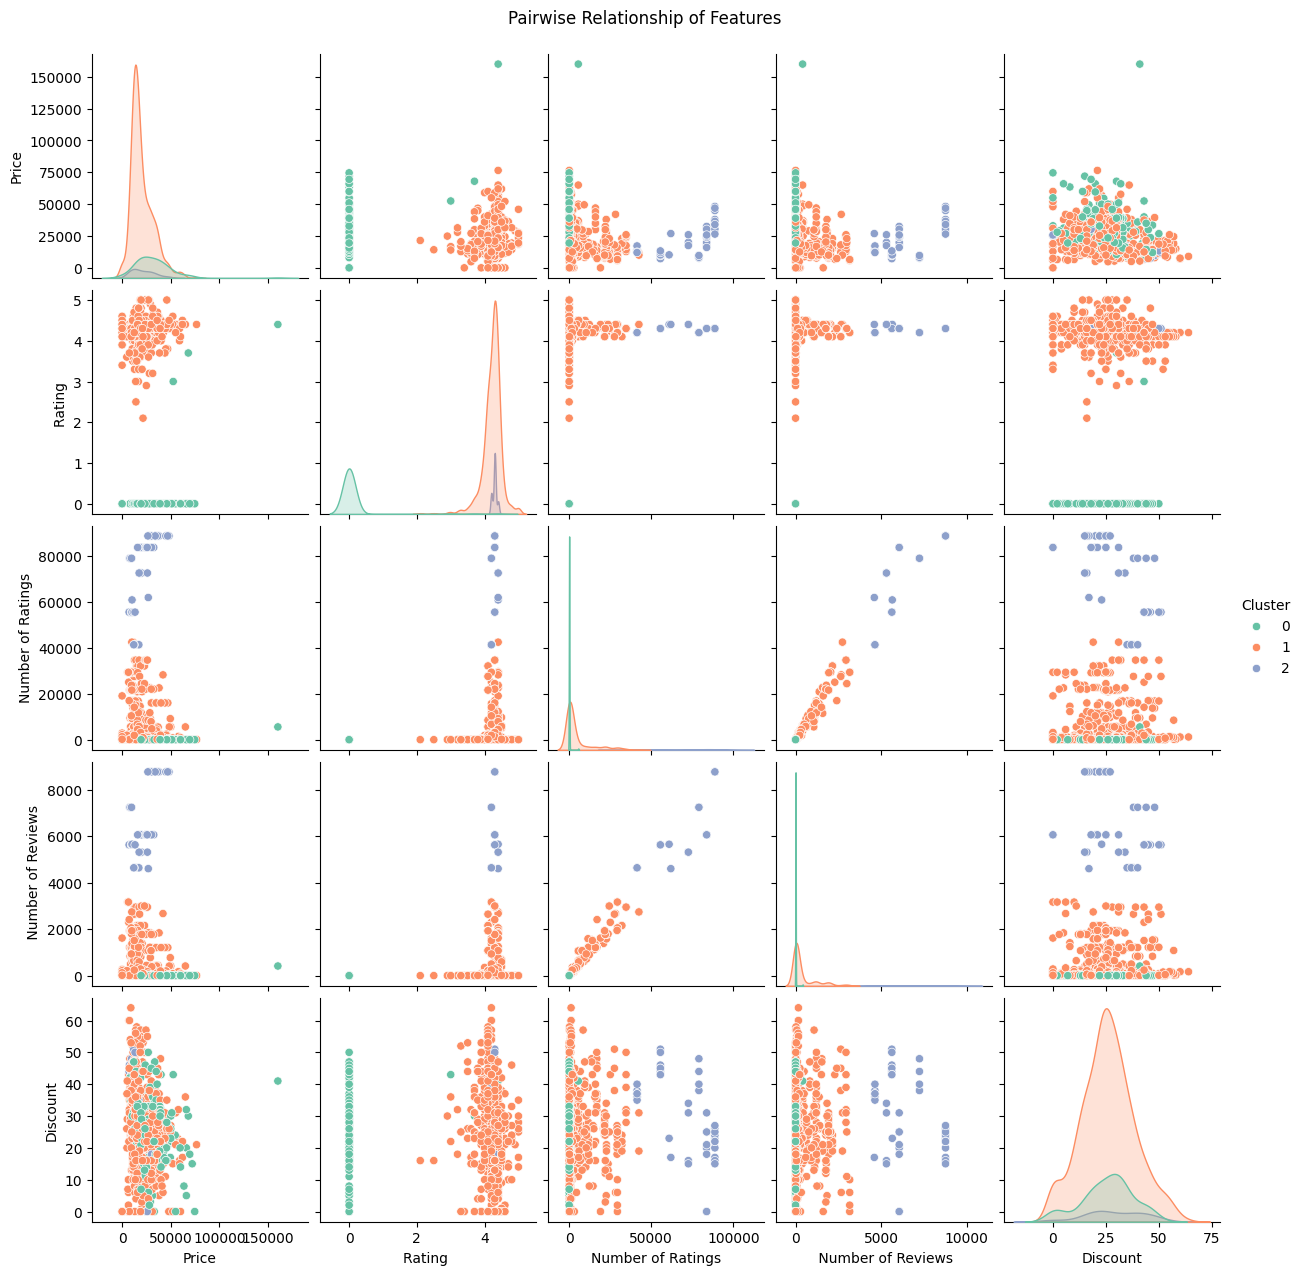

In [36]:
sns.pairplot(df, hue='Cluster', palette='Set2')
plt.suptitle('Pairwise Relationship of Features', y=1.02)
plt.show()

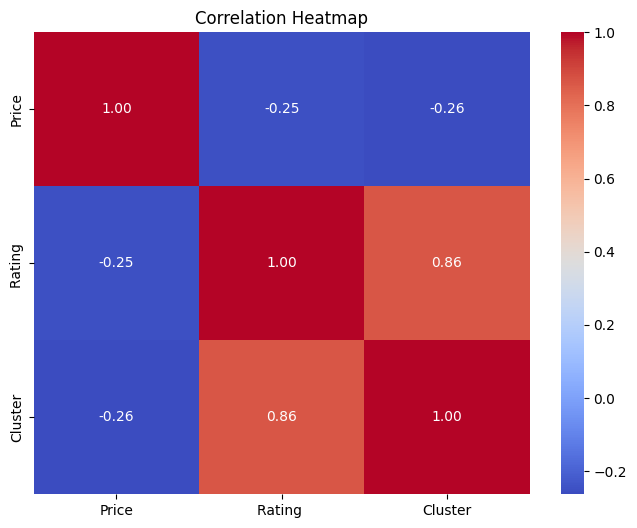

In [39]:
# Calculate correlation matrix
correlation_matrix = df[['Price', 'Rating ', 'Cluster']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.to_csv('clustered_washing_machines.csv', index=False)

## Supervised Learning

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report


In [42]:
df = pd.read_csv("cleaned_flipkart_machine.csv")  
df.head()

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Discount,Type
0,Thomson 7.5 kg 5 Star Aqua Magic Semi Automati...,8190,4.1,21600,1927,28,Semi Automatic
1,realme TechLife 7 kg 5 Star Rating Fabric Safe...,11290,4.2,13740,1534,48,Fully Automatic
2,realme TechLife 7 kg 5 Star rating Semi Automa...,7690,4.2,79020,7237,38,Semi Automatic
3,Voltas Beko 8 kg Semi Automatic Top Load Washi...,10290,4.3,16840,1219,45,Semi Automatic
4,"LG 7 kg 5 Star, Smart Inverter Technology, Tur...",17990,4.4,72597,5309,34,Fully Automatic


In [43]:
import numpy as np
import re

# Extract LoadType from Product Name
df['LoadType'] = np.where(df['Product Name'].str.contains('Top Load', case=False), 'Top Load',
                  np.where(df['Product Name'].str.contains('Front Load', case=False), 'Front Load', 'Unknown'))

# Extract Capacity from Product Name
df['Capacity'] = df['Product Name'].str.extract(r'(\d+\.?\d*)\s*kg', flags=re.IGNORECASE)
df['Capacity'] = df['Capacity'].astype(float)


In [44]:
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True) 
df['LoadType'].fillna('Unknown', inplace=True) 

C:\Users\admin\AppData\Local\Temp\ipykernel_9716\651347519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_9716\651347519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [45]:
#Encode Categorical Variables
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])  # 0 for Semi Automatic, 1 for Fully Automatic
df['LoadType'] = le.fit_transform(df['LoadType'])  # 0 for Top Load, 1 for Front Load

In [15]:
df['Capacity'] = df['Capacity'].astype(float)


In [80]:
# Convert to string first 
df['Capacity'] = df['Capacity'].astype(str).str.replace(' kg', '').astype(float)


In [50]:
print(df.columns)


Index(['Product Name', 'Price', 'Rating', 'Number of Ratings',
       'Number of Reviews', 'Discount', 'Type', 'LoadType', 'Capacity'],
      dtype='object')


In [51]:
#The target variable will be Type (Fully Automatic or Semi Automatic).
features = ['Price', 'Rating', 'Number of Ratings', 'Number of Reviews', 'Discount', 'Capacity', 'LoadType']
X = df[features]
y = df['Type']


In [52]:
#Scaling the features so that they are all in the same range, especially for algorithms like SVM and KNN.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [53]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [54]:
#Train Multiple Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [55]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Train, Predict & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1
    })

    print(f"\n📊 {name}")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print(classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))



📊 Logistic Regression
Accuracy: 0.8735632183908046
F1 Score: 0.8472222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       102
           1       0.85      0.85      0.85        72

    accuracy                           0.87       174
   macro avg       0.87      0.87      0.87       174
weighted avg       0.87      0.87      0.87       174


📊 Support Vector Machine
Accuracy: 0.9482758620689655
F1 Score: 0.935251798561151
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.97      0.90      0.94        72

    accuracy                           0.95       174
   macro avg       0.95      0.94      0.95       174
weighted avg       0.95      0.95      0.95       174


📊 K-Nearest Neighbors
Accuracy: 0.9137931034482759
F1 Score: 0.8905109489051095
              precision    recall  f1-score   support

           0       0.90      0.96      0.93   

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [21:42:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost
Accuracy: 0.9712643678160919
F1 Score: 0.965034965034965
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.97      0.96      0.97        72

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



In [56]:
#Summary Table of Model Performances
summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values(by="F1 Score", ascending=False)
print("\n Model Comparison:")
print(summary_df)



 Model Comparison:
                    Model  Accuracy  F1 Score
4                 XGBoost  0.971264  0.965035
3           Random Forest  0.971264  0.964029
1  Support Vector Machine  0.948276  0.935252
2     K-Nearest Neighbors  0.913793  0.890511
0     Logistic Regression  0.873563  0.847222


## Hyperparameter Tuning 

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
import numpy as np


In [74]:
#Define the Model
rf = RandomForestClassifier(random_state=42)

In [75]:
#Set Up the Hyperparameter Distributions
param_dist = {
    'n_estimators': np.arange(50, 151, 50),  # 50, 100, 150
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False]
}



In [76]:
#Initialize and Fit RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Utilize all available cores
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150])},
                   random_state=42, verbose=2)

In [77]:
#Retrieve and Evaluate the Best Model
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("F1 Score:", f1)


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Accuracy Score: 0.9827586206896551
F1 Score: 0.982700139292056
